In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from IPython import display
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


# #Welcome to digit recongizer project!
In this project, we try our best to create the model that predict the number hand written by applying classification using a neural network(MLP) with Keres
1) Explore our data <br>
2) Split Train, Test, Validatoin <br>
3) Normalize and change the data type <br>
4) define the MLP model <br>
5) Train the model <br>
6) Predict the test data <br>
7) Submit the prediction

In [2]:
train_data = np.loadtxt('../input/digit-recognizer/train.csv', delimiter=',', skiprows=1)
test_data = np.loadtxt('../input/digit-recognizer/test.csv', delimiter=',', skiprows=1)
submission = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv',index_col=0)

In [3]:
print("Train Shape:", train_data.shape)
print("Test Shape:", test_data.shape)

Train Shape: (42000, 785)
Test Shape: (28000, 784)


In [4]:
train_data[0].max()

255.0

In [5]:
train_data[:, 1:].shape

(42000, 784)

# # 2) Split training and validation data

In [6]:
x_train = train_data[:, 1:]
y_train = train_data[:, 0]
x_test = test_data

In [7]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(42000, 784)
(42000,)
(28000, 784)


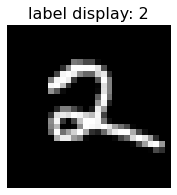

<Figure size 432x288 with 0 Axes>

In [8]:
fig, ax = plt.subplots(figsize=(3, 3))
for n in range(0, x_train.shape[0], 1000):
    Image = x_train[n,:].reshape(28,28)
    ax.imshow(Image, cmap='gray')
    ax.set_title('label display: ' + str(int(y_train[n])), fontsize=16)
    ax.axis('off')
    plt.draw()
    display.clear_output(wait=True)
    display.display(fig)
    plt.pause(0.5)

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=0)

In [10]:
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_val:', x_val.shape)
print('y_val:', y_val.shape)
print('x_test:', x_test.shape)

x_train: (37800, 784)
y_train: (37800,)
x_val: (4200, 784)
y_val: (4200,)
x_test: (28000, 784)


In [11]:
x_train[0].max()

255.0

# 3) Normalization and change type

In [12]:
#normalization (from the maximum)
x_train /= 255
x_val /= 255
x_test /= 255

#change type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

check the answer 2.0


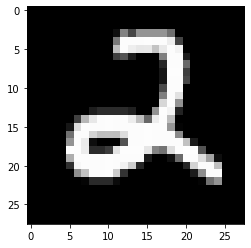

In [13]:
#show the image(x_train) and key answer (y_train)
plt.imshow(x_train[0].reshape(28,28), cmap='gray')
print("check the answer", y_train[0])

# 4) Define the MPL model

In [14]:
model = Sequential()
model.add(Dense(units=256, activation='relu', input_shape=(784,)))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=10,  activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer=SGD(lr=0.01, momentum=0.9),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


2023-02-04 22:40:41.026582: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [15]:
# create a list to store the accuracy rate
loss_train_list=[]
loss_val_list=[]
acc_train_list=[]
acc_val_list=[]

# 5) Train the model

In [16]:
for epoch in range(0, 20):
    print('epoch', epoch)
    #set epochs=1
    history=model.fit(x_train, y_train, batch_size=64, epochs=1, validation_data=(x_val, y_val))
    loss_train_list.extend(history.history['loss'])
    loss_val_list.extend(history.history['val_loss'])
    acc_train_list.extend(history.history['accuracy'])
    acc_val_list.extend(history.history['val_accuracy'])
    #save the model to a a HDF5 file
    if (epoch+1)%10 == 0:
        model.save('MLP_Keras_e'+str(epoch)+'.h5')

epoch 0


2023-02-04 22:40:41.414237: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


591/591 [==============================] - 3s 5ms/step - loss: 0.4121 - accuracy: 0.8804 - val_loss: 0.2546 - val_accuracy: 0.9262
epoch 1
591/591 [==============================] - 3s 5ms/step - loss: 0.1801 - accuracy: 0.9462 - val_loss: 0.1744 - val_accuracy: 0.9498
epoch 2
591/591 [==============================] - 3s 5ms/step - loss: 0.1257 - accuracy: 0.9633 - val_loss: 0.1481 - val_accuracy: 0.9576
epoch 3
591/591 [==============================] - 3s 4ms/step - loss: 0.0962 - accuracy: 0.9710 - val_loss: 0.1349 - val_accuracy: 0.9586
epoch 4
591/591 [==============================] - 3s 5ms/step - loss: 0.0758 - accuracy: 0.9776 - val_loss: 0.1194 - val_accuracy: 0.9650
epoch 5
591/591 [==============================] - 3s 5ms/step - loss: 0.0620 - accuracy: 0.9830 - val_loss: 0.1094 - val_accuracy: 0.9667
epoch 6
591/591 [==============================] - 3s 5ms/step - loss: 0.0489 - accuracy: 0.9860 - val_loss: 0.1126 - val_accuracy: 0.9671
epoch 7
591/591 [==================

Plot training histroy: loss vs epoch and accuracy vs epoch

In [17]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

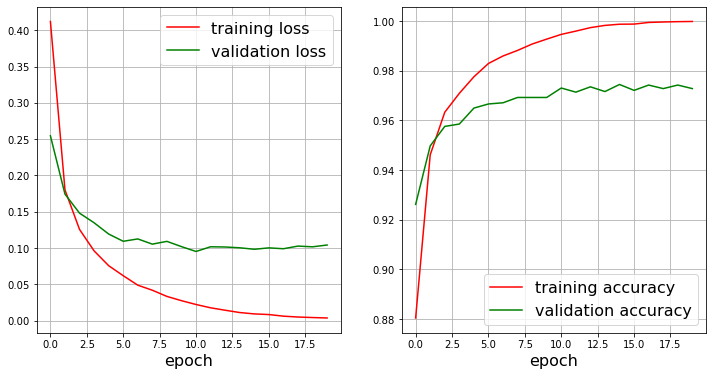

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].plot(np.arange(0,len(loss_train_list)), loss_train_list, '-r', label='training loss')
ax[0].plot(np.arange(0,len(loss_val_list)), loss_val_list, '-g', label='validation loss')
ax[0].set_xlabel('epoch',fontsize=16)
ax[0].legend(fontsize=16)
ax[0].grid(True)
ax[1].plot(np.arange(0,len(acc_train_list)), acc_train_list, '-r', label='training accuracy')
ax[1].plot(np.arange(0,len(acc_val_list)), acc_val_list, '-g', label='validation accuracy')
ax[1].set_xlabel('epoch',fontsize=16)
ax[1].legend(fontsize=16)
ax[1].grid(True)

In [19]:
# load the best model
from keras.models import load_model
model = load_model('MLP_Keras_e9.h5')

# 6) Predict the test data

In [20]:
# prediction
result = model.predict(x_test)
result = np.argmax(result, axis=1)

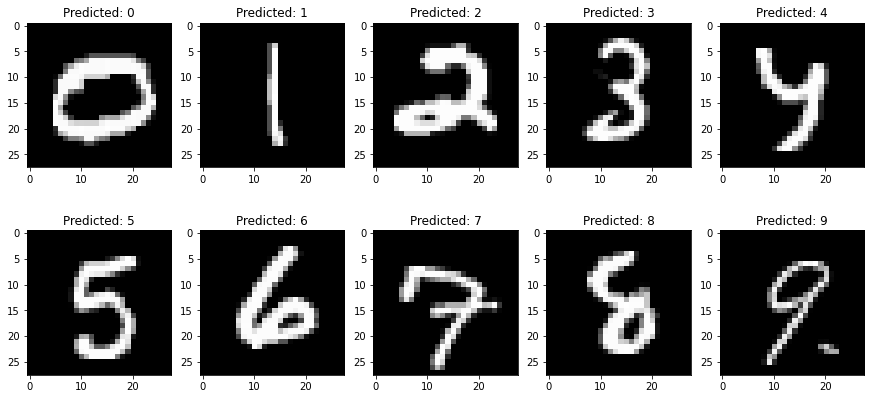

In [21]:
# sample predictions
plt.figure(figsize=(15,7))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[result==i][0].reshape(28,28), cmap='gray')
    plt.title(f"Predicted: {i}")
plt.show()

# 7) Submit the prediction

In [22]:
submission.Label = result
submission.to_csv('submission.csv')
pd.read_csv('submission.csv',index_col=0)

,Label
ImageId,
1,2
2,0
3,9
4,9
5,3
...,...
27996,9
27997,7
27998,3
